# Binary case

In [1]:
import pandas as pd
import numpy as np 

In [2]:
first_table = pd.DataFrame({'sex':['male','female'], 'rep':[200,250], 'dem':[150,300], 'ind':[50,50]})

In [4]:
first_table

,sex,rep,dem,ind
0,male,200,150,50
1,female,250,300,50


3 points of interest:

The degrees of freedom (DF) is equal to:
$$DF = (row - 1) * (col - 1)$$
Expected frequencies:
$$ E_{r,c} = (n_r * n_c) / n $$
Test statistic:
$$Χ2 = \sum [ (O_{r,c} - E_{r,c})2 / E_{r,c} ]$$

In [5]:
DF = (2-1) *(3-1)
print(DF)

2


In [ ]:
first_table['count_m_f'] = 

![p-value table](https://meiosisvariationinheritance.files.wordpress.com/2011/05/chi-squared-table-neee.png)

## non binary problem

In [9]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


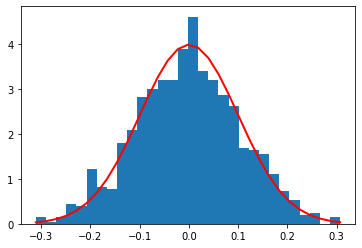

In [10]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


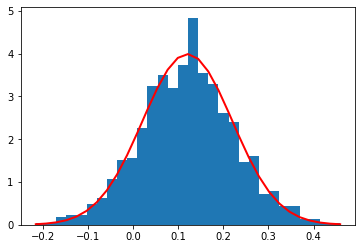

In [13]:
s2 = np.random.normal(0.12, 0.1, 1000)
count, bins, ignored = plt.hist(s2, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0.12)**2 / (2 * 0.1**2) ),
         linewidth=2, color='r')
plt.show()

In [14]:
from scipy import stats

In [17]:
stats.ttest_ind(s2,s,equal_var=True)

Ttest_indResult(statistic=26.43767825176332, pvalue=2.4941080814954145e-132)

## Non normal

In [18]:
from scipy.stats import dweibull
c = 2.07
r = dweibull.rvs(c, size=1000)

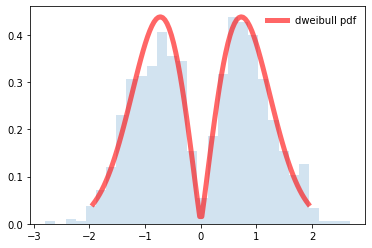

In [29]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(dweibull.ppf(0.01, c),
                dweibull.ppf(0.99, c), 100)
ax.plot(x, dweibull.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='dweibull pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=30)
ax.legend(loc='best', frameon=False)
plt.show()

In [53]:
r2 = dweibull.rvs(c=3.1,loc=0.3, size=1000)

No handles with labels found to put in legend.


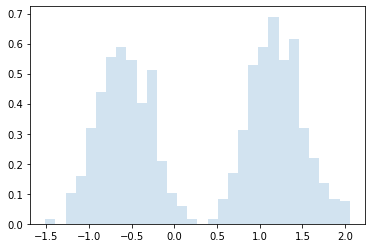

In [54]:
fig, ax = plt.subplots(1, 1)
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, bins=30)
ax.legend(loc='best', frameon=False)
plt.show()

In [55]:
stats.mannwhitneyu(r,r2)

MannwhitneyuResult(statistic=391077.0, pvalue=1.6561261009425967e-17)